In [1082]:
# Victor Olazabal
#Cap 5610
#HW-1

In [1059]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [1060]:
## Dictionary

# Survival: 0 = no | 1 = yes
# Pclass: 1 = 1st (Upper class) | 2 = 2nd (Middle class) | 3 = 3rd (Low class) 
# sibSp: number of siblings/spouses aboard
# parch: number of parents/children aboard
# Embarked: C = Cherbourg | Q = Queenstown | S = Southampton

In [1061]:
trainSet = pd.read_csv('dataset/train.csv')
testSet = pd.read_csv('dataset/train.csv')

# combinedSets = [trainSet, testSet]

In [1062]:
# Helper for Q1
print('Num of features:', len(trainSet.columns))
print(trainSet.columns)

Num of features: 12
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [1063]:
# Helper for Q5
print(trainSet.isnull())

     PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked

In [1064]:
# helper for Q6
print(trainSet.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [1065]:
# Helper for Q7
print(trainSet.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [1066]:
# Helper for Q8
categoricalDF = trainSet[['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']]
print(categoricalDF.describe())

                                 Name   Sex    Ticket Cabin Embarked
count                             891   891       891   204      889
unique                            891     2       681   147        3
top     Beckwith, Mr. Richard Leonard  male  CA. 2343    G6        S
freq                                1   577         7     4      644


In [1067]:
# Helper for Q9
class1 = trainSet['Survived'].isin(['1']) & trainSet['Pclass'].isin(['1'])
class2 = trainSet['Survived'].isin(['1']) & trainSet['Pclass'].isin(['2'])
class3 = trainSet['Survived'].isin(['1']) & trainSet['Pclass'].isin(['3'])

print('Passenger class 1')
print(class1.value_counts(), '\n')

print('Passenger class 2')
print(class2.value_counts(), '\n')

print('Passenger class 1')
print(class3.value_counts())

Passenger class 1
False    755
True     136
dtype: int64 

Passenger class 2
False    804
True      87
dtype: int64 

Passenger class 1
False    772
True     119
dtype: int64


In [1068]:
# Helper for Q10
femaleSurvivor = trainSet['Sex'].isin(['female']) & trainSet['Survived'].isin(['1'])
maleSurvivor = trainSet['Sex'].isin(['male']) & trainSet['Survived'].isin(['1'])

print('Female Survivors')
print(femaleSurvivor.value_counts(), '\n')

print('Male Survivors')
print(maleSurvivor.value_counts())

Female Survivors
False    658
True     233
dtype: int64 

Male Survivors
False    782
True     109
dtype: int64


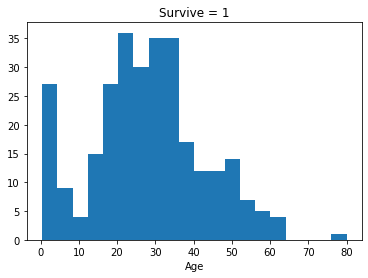

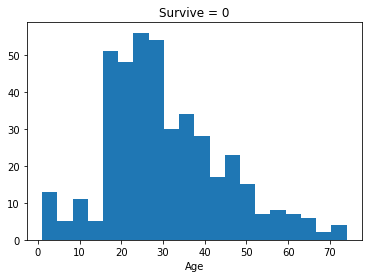

In [1069]:
# HElper for Q11
survived = trainSet[trainSet.Survived == 1]
notSurvived = trainSet[trainSet.Survived == 0]

fig1 = plt.figure()
ax1 = fig1.add_subplot(1, 1, 1)
n, bins, patches = ax1.hist(survived['Age'], bins=20)
ax1.set_xlabel('Age')
ax1.set_title('Survive = 1')

fig2 = plt.figure()
ax2 = fig2.add_subplot(1, 1, 1)
n, bins, patches = ax2.hist(notSurvived['Age'], bins=20)
ax2.set_xlabel('Age')
ax2.set_title('Survive = 0')

plt.show()

# of class 1 passengers:  216
Survived:  136  | Not survived:  80

# of class 2 passengers:  184
Survived:  87  | Not survived:  97

# of class 3 passengers:  491
Survived:  119  | Not survived:  372


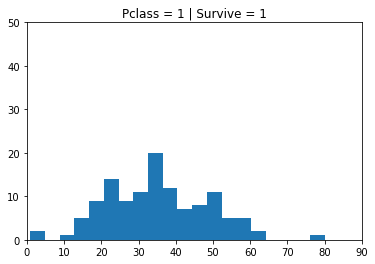

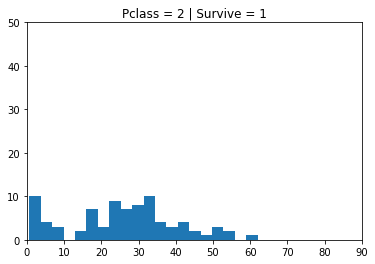

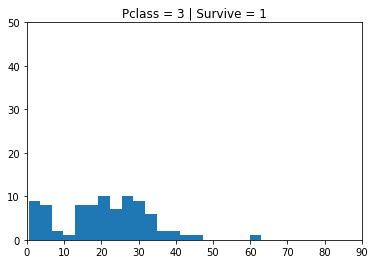

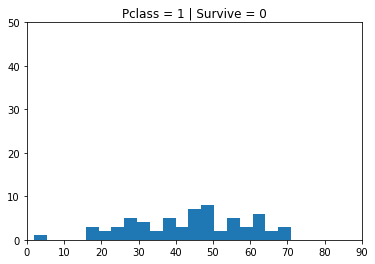

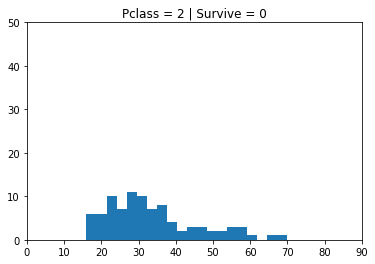

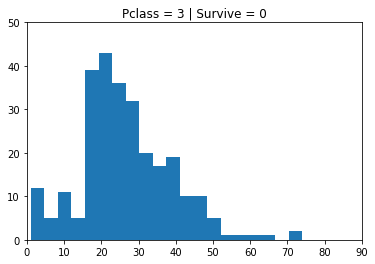

In [1070]:
# Helper for Q12

# Pclass = 1 | Survived = 1
age1 = survived[survived.Pclass == 1]['Age']
age1Survived = plt.figure()
ax1 = age1Survived.add_subplot(1, 1, 1)
n, bins, patches = ax1.hist(age1, bins=20)
ax1.set_title('Pclass = 1 | Survive = 1')
ax1.set_xlim([0, 90])
ax1.set_ylim([0, 50])

# Pclass = 2 | Survived = 1
age2 = survived[survived.Pclass == 2]['Age']
age2Survived = plt.figure()
ax2 = age2Survived.add_subplot(1, 1, 1)
n, bins, patches = ax2.hist(age2, bins=20)
ax2.set_title('Pclass = 2 | Survive = 1')
ax2.set_ylim([0, 50])
ax2.set_xlim([0, 90])

# Pclass = 3 | Survived = 1
age3 = survived[survived.Pclass == 3]['Age']
age3Survived = plt.figure()
ax3 = age3Survived.add_subplot(1, 1, 1)
n, bins, patches = ax3.hist(age3, bins=20)
ax3.set_title('Pclass = 3 | Survive = 1')
ax3.set_ylim([0, 50])
ax3.set_xlim([0, 90])

# Pclass = 1 | Survived = 0
age4 = notSurvived[notSurvived.Pclass == 1]['Age']
age4Survived = plt.figure()
ax4 = age4Survived.add_subplot(1, 1, 1)
n, bins, patches = ax4.hist(age4, bins=20)
ax4.set_title('Pclass = 1 | Survive = 0')
ax4.set_ylim([0, 50])
ax4.set_xlim([0, 90])

# Pclass = 2 | Survived = 0
age5 = notSurvived[notSurvived.Pclass == 2]['Age']
age5Survived = plt.figure()
ax5 = age5Survived.add_subplot(1, 1, 1)
n, bins, patches = ax5.hist(age5, bins=20)
ax5.set_title('Pclass = 2 | Survive = 0')
ax5.set_ylim([0, 50])
ax5.set_xlim([0, 90])

# Pclass = 3 | Survived = 0
age6 = notSurvived[notSurvived.Pclass == 3]['Age']
age6Survived = plt.figure()
ax6 = age6Survived.add_subplot(1, 1, 1)
n, bins, patches = ax6.hist(age6, bins=20)
ax6.set_title('Pclass = 3 | Survive = 0')
ax6.set_ylim([0, 50])
ax6.set_xlim([0, 90])


print('# of class 1 passengers: ', trainSet[trainSet['Pclass'] == 1].Pclass.count())
print('Survived: ', survived[survived['Pclass'] == 1].Pclass.count(), 
' | Not survived: ', notSurvived[notSurvived['Pclass'] == 1].Pclass.count())

print('\n# of class 2 passengers: ', trainSet[trainSet['Pclass'] == 2].Pclass.count())
print('Survived: ', survived[survived['Pclass'] == 2].Pclass.count(), 
' | Not survived: ', notSurvived[notSurvived['Pclass'] == 2].Pclass.count())

print('\n# of class 3 passengers: ', trainSet[trainSet['Pclass'] == 3].Pclass.count())
print('Survived: ', survived[survived['Pclass'] == 3].Pclass.count(), 
' | Not survived: ', notSurvived[notSurvived['Pclass'] == 3].Pclass.count())

plt.show()

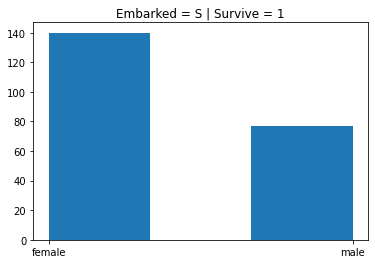

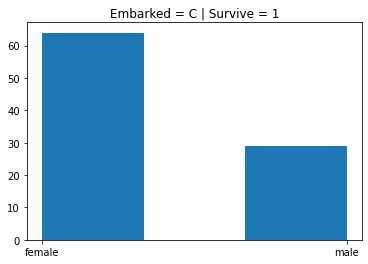

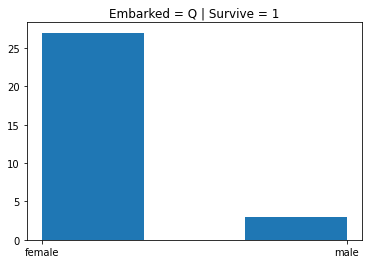

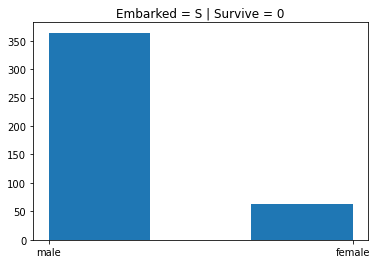

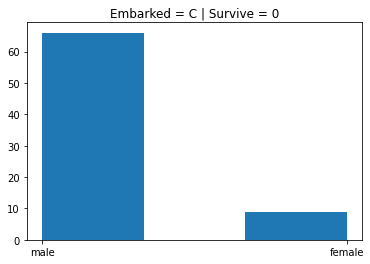

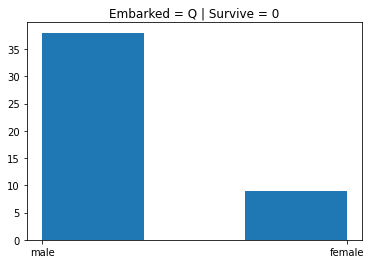

In [1071]:
# Helper for Q13

# Embarked = S | Survived = 1
graph1 = survived[survived.Embarked == 'S']['Sex']
graph1Survived = plt.figure()
ax1 = graph1Survived.add_subplot(1, 1, 1)
n, bins, patches = ax1.hist(graph1, bins=3)
ax1.set_title('Embarked = S | Survive = 1')

# Embarked = C | Survived = 1
graph2 = survived[survived.Embarked == 'C']['Sex']
graph2Survived = plt.figure()
ax2 = graph2Survived.add_subplot(1, 1, 1)
n, bins, patches = ax2.hist(graph2, bins=3)
ax2.set_title('Embarked = C | Survive = 1')

# Embarked = Q | Survived = 1
graph3 = survived[survived.Embarked == 'Q']['Sex']
graph3Survived = plt.figure()
ax3 = graph3Survived.add_subplot(1, 1, 1)
n, bins, patches = ax3.hist(graph3, bins=3)
ax3.set_title('Embarked = Q | Survive = 1')

# Embarked = S | Survived = 0
graph4 = notSurvived[notSurvived.Embarked == 'S']['Sex']
graph4Survived = plt.figure()
ax4 = graph4Survived.add_subplot(1, 1, 1)
n, bins, patches = ax4.hist(graph4, bins=3)
ax4.set_title('Embarked = S | Survive = 0')

# Embarked = C | Survived = 0
graph5 = notSurvived[notSurvived.Embarked == 'C']['Sex']
graph5Survived = plt.figure()
ax5 = graph5Survived.add_subplot(1, 1, 1)
n, bins, patches = ax5.hist(graph5, bins=3)
ax5.set_title('Embarked = C | Survive = 0')

# Embarked = Q | Survived = 0
graph6 = notSurvived[notSurvived.Embarked == 'Q']['Sex']
graph6Survived = plt.figure()
ax6 = graph6Survived.add_subplot(1, 1, 1)
n, bins, patches = ax6.hist(graph6, bins=3)
ax6.set_title('Embarked = Q | Survive = 0')



plt.show()

count    342.000000
mean      48.395408
std       66.596998
min        0.000000
25%       12.475000
50%       26.000000
75%       57.000000
max      512.329200
Name: Fare, dtype: float64


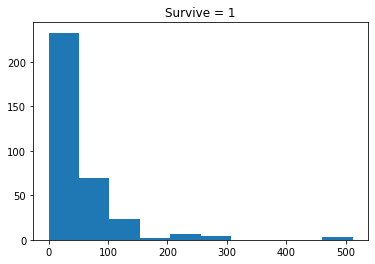

In [1072]:
# Helper for Q13
graph6 = survived.Fare
graph6Survived = plt.figure()
ax6 = graph6Survived.add_subplot(1, 1, 1)
n, bins, patches = ax6.hist(graph6)
ax6.set_title('Survive = 1')

print(graph6.describe())


In [1073]:
# Helper for Q14
print('Duplicate Survival ticket count:')
ticketDuplicate = survived.Ticket.duplicated()
print(ticketDuplicate.value_counts())
print()
print('Survived Tickets: ', survived.Ticket.count())
print('Not Survived Tickets: ', notSurvived.Ticket.count())

Duplicate Survival ticket count:
False    260
True      82
Name: Ticket, dtype: int64

Survived Tickets:  342
Not Survived Tickets:  549


In [1074]:
# Helper for Q15

cabin = trainSet.Cabin.isnull()
print(cabin.value_counts())

True     687
False    204
Name: Cabin, dtype: int64


In [1075]:
# Helper for Q16

trainSet.loc[trainSet.Sex == 'male', 'Gender'] = 0 
trainSet.loc[trainSet.Sex == 'female', 'Gender'] = 1
print(trainSet.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Gender  
0      0         A/5 21171   7.2500   NaN        S     0.0  
1      0          PC 17599  71.2833   C85        C     1.0  
2      0  STON/O2. 3101282   7.9250   NaN        S     1.0  
3      0            113803  53.1000  C123        S     1.0  
4      0       

In [1076]:
# Helper for Q17

ageSet = trainSet['Age']

high = int(ageSet.mean())
low = int(ageSet.std())

trainSet['Age'] = trainSet['Age'].fillna(trainSet['Age'].apply(lambda v: random.randrange(low, high)))
print('Number of Non-empty cell in "Age" column:', trainSet['Age'].isnull().value_counts()[0])

Number of Non-empty cell in "Age" column: 891


In [1077]:
#Helper for Q18

trainSet['Embarked'] = trainSet['Embarked'].where(pd.notnull(trainSet['Embarked']), trainSet['Embarked'].mode()[0])
print('Number of Non-empty cell in "Embarked" column:', trainSet['Embarked'].isnull().value_counts()[0])

Number of Non-empty cell in "Embarked" column: 891


In [1078]:
# Helper for Q19
fareNulls = trainSet['Fare'].isnull()
print(fareNulls.value_counts())
print()
print('Most frequent value: ', trainSet['Fare'].mode()[0])

False    891
Name: Fare, dtype: int64

Most frequent value:  8.05


In [1079]:
# Helper for Q20

trainSet['FareBand'] = pd.qcut(trainSet['Fare'], 4)
print(trainSet[['FareBand', 'Survived']].groupby('FareBand').mean())
print()
print(trainSet.head())

                 Survived
FareBand                 
(-0.001, 7.91]   0.197309
(7.91, 14.454]   0.303571
(14.454, 31.0]   0.454955
(31.0, 512.329]  0.581081

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Gender         FareBand  
0      0         A/5 21171   7.2500   NaN        S     0.0   (-0.001, 7.91]  
1      